In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
# пришлось подгрузить батч-нормализатор (нормализация данных от 0 до 1), так как оптимизатор Адам плохо кушал 
# ненормализованные данные
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Flatten   # импорт слоёв... flatten - слой-предобработка входящих данных

In [6]:
# качаем тестовые данные изображений, сразу разбиваем их на 2 кортежа (в каждом сплитнутые x - изображения и y - ответы)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [18]:
# assert'ом утверждаемся, что по форме данных всё как надо 60к картинок 28х28 пикселей в трэйне, 60к ответов и тестовые данные
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)
# выведем ответ из массива y, [0] элемент
y_train[0]

5

In [10]:
# вытащим одну картинку в виде массива из 'x' тренировочных данных, чтобы увидеть что мы будем скармливать нашему оптимизатору 
# в качестве данных
img0 = x_train[0]
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

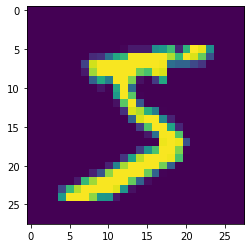

In [11]:
# НУЖНО НОРМАЛИЗОВАТЬ! чтобы значения были в районе 0 или от 0 до 1 в зависимости от типа нормализации для лучших результатов
# как видим, это массив от 0 до 255 - каждый пиксель это числовое значение цвета. Всего пикселей в одном изображении 28х28
# мы будем кормить этим нейросеть, а на выходе показывать правильный ответ, соответственно по ходу обучения будут подбираться
# правильные веса, чтобы подобное же изображение с некоторой вероятностью можно было классифицировать как ответ
# теперь выведем рисунком этот массив
plt.imshow(img0, interpolation='nearest')

In [31]:
# переделаем выходные данные из числовых int в вектор с 10 элементами, иначе на этапе обучения будем получать ошибку
# несоответствия форм выходного сигнала и ответа в датасэте 'y'
# воспользуемся матодом преобразования числа в бинарный ветор keras.utils.to_categorical и укажем
# целевой сет, число классов (оно же число выходных сигналов, оно же число элементов вектора) чтобы выходные сигналы
# совпадали по форме. Выведем нашу пятёрку в виде бинарного вектора
y_train_categ = keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")
# сразу переделаем и тестовые ответы
y_test_categ = keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")
y_train_categ[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [43]:
# это действительно пятёрка (шестой элемент '1' - это наша пятёрка, так как счёт начинается с нуля)
# нормлизуме данные в массивах (сейчас они от 0 до 255 в зависимости от цвета, нам нужно от 0 до 1), разделив на 255
input_train = x_train / 255
# и тест сет тоже нормализуем
input_test = x_test / 255

In [48]:
# даавйте попробуем содать модельку с параметрами сети
# зададим класс последовательной нейронной сети
model = Sequential()
# используем выпрямитель наших массивов (переработаем 28 строк в 1 строку - колбасу) в меньшую размерность
model.add(Flatten(input_shape=(28, 28, 1)))
# далее задаём слои, указывая в параметрах количество нейронов в слое и функцию активации
# функции активации и схема сети заданы почти наугад, вообще это отдельная большая тема 
# вставляем батч-нормализацию перед каждым слоем нейронов, хотя данные у нас и так нормализованы, но лишним, я думаю, не будет
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# выводим общие параметры модели
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 batch_normalization_8 (Batc  (None, 64)              

In [49]:
# создаём среду модели, с оптимизатором (задаём именно так, подбирая нужный learning_rate),
# параметром по которому функция будет сравнивать модели (loss) и метрику точности (metrics)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
# фитим модель тренировочными нормализованными Х и категорированными Y данными, задаём размер 1 порции данных - 32,
# количество иттераций обучения - 5,
# указываем пропорцию сплита данных на тренировочные и валидационые (как кросс-валидация в машинном обучении Склёрн) - 25%
model.fit(input_train, y_train_categ, batch_size=64, epochs=7, validation_split=0.25)
# запускаем, перекрестимся чтобы комп не улетел на Луну. Алюминь

# в этом моменте возникла ошибка 'ValueError: Shapes (None, 1) and (None, 10) are incompatible'
# ошибка формы, так как я пытался получить одноканальный ответ от 10-канального слоя нейронов...
# значение 'y' у нас записано в виде числа, а надо преобразовать его в вектор-массив из 10 элементов, чтобы последний слой
# нейронов выдавал также 10 сигналов - 9 нулей и 1 единицу, соответствующую нашему классу изображения

Epoch 1/7
704/704 [==============================] - 10s 12ms/step - loss: 0.2492 - accuracy: 0.9272 - val_loss: 0.1314 - val_accuracy: 0.9613
Epoch 2/7
704/704 [==============================] - 8s 11ms/step - loss: 0.1014 - accuracy: 0.9693 - val_loss: 0.1167 - val_accuracy: 0.9647
Epoch 3/7
704/704 [==============================] - 7s 11ms/step - loss: 0.0707 - accuracy: 0.9782 - val_loss: 0.1047 - val_accuracy: 0.9706
Epoch 4/7
704/704 [==============================] - 7s 10ms/step - loss: 0.0475 - accuracy: 0.9844 - val_loss: 0.1127 - val_accuracy: 0.9701
Epoch 5/7
704/704 [==============================] - 7s 10ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.1087 - val_accuracy: 0.9720
Epoch 6/7
704/704 [==============================] - 7s 11ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.1106 - val_accuracy: 0.9703
Epoch 7/7
704/704 [==============================] - 7s 10ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.1085 - val_accuracy: 0.9731


In [51]:
# прежде чем все получилось, была проблема с оптимизатором Адам, проблема с нормализацией данных и т.п. 
# глянем на лог...7секунд обучение 1 эпохи, до нормализации был по 8+ секунд, всратые значения точности и лоса
# ладно, глянем какие результаты нам покажут тестовые данные на этой обученной модели
model.evaluate(input_test, y_test_categ)

313/313 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.9757


[0.09764309972524643, 0.9757000207901001]

In [58]:
# выведем предсказание первого изображения из тестовой нормализованной выборки, нужно добавить массиву размерность
# делаем это с помощью метода np.expand_dims
x = np.expand_dims(input_test[0], axis=0)
model.predict(x)

1/1 [==============================] - 0s 31ms/step


array([[3.9872871e-06, 8.9105917e-08, 2.6486376e-07, 9.2825786e-07,
        9.0930419e-09, 3.6458331e-08, 2.8737759e-10, 9.9999452e-01,
        1.1169299e-09, 1.3409462e-07]], dtype=float32)

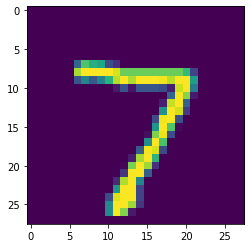

In [60]:
# смотрим на массив вероятностей, находим большее значение 9.9999452e-0 - почти 100% вероятность, что сигнал с этого 7-го
# нейрона указал нам правильный класс
# нарисуем это же первое изображение из тестовой выборки
plt.imshow(x_test[0], interpolation='nearest')

In [61]:
# это семёрка, как и было указано машиной на 7ой нейрон с вероятностью близкой к 100%
# на всякий случай выведем первый ответ из Y тестовой выборки
y_test[0]

7

In [ ]:
Тоже семёрка. Закончим мучить эту модель.
Итак, подытожим.
-При работе с изображениями (и не только с ними, скорее при решении задачи классификации) важна нормализация данных.
-Число каналов последнего слоя (нейронов) должно совпадать с размерностью вывода информации, формы должны соотвествовать друг другу.
-При работе с массивами нужно снижать размерность входных данных (Flatten)
-Батч-нормализация и послойная (layers) нормализация (её ещё не пробовал) особенно важны, если данные изначально не нормализованы делением
-Структура сети (число нейроном, функция активации) это очень спорный вопрос, требует дальнейшего изучения
-Для предсказания, модели нужны данные с расширенной размерностью np.expand_dims, иначе не отрисует
-Результат предсказания (работы) модели-классификатора - это ВЕРОЯТНОСТЬ отнесения к тому или иному классу, а не нечто иное.
'Небольшой расход'(c)